In [4]:
# Save this file in the name of the ML model you are using
import pandas as pd
import numpy as np
import os

In [5]:
# Website for the dataset:
# https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data?select=icml_face_data.csv

CLASS_NAMES = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
FILE_NAME = "train.csv" # Insert file name
WHITE_IMAGES = [6458,  7629, 10423, 11286, 13148, 13402, 13988, 15894, 22198, 22927, 28601, 59]

In [7]:
data_path = ["E:/Anaconda/data"] # Insert data file path
file_path = os.sep.join(data_path + [FILE_NAME])
data = pd.read_csv(file_path)
data = data.drop(index=WHITE_IMAGES, axis=0)

# If icml_face_data.csv is used
# data.drop(' Usage', axis=1, inplace=True)

data.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [8]:
data.shape

(28697, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28697 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28697 non-null  int64 
 1   pixels   28697 non-null  object
dtypes: int64(1), object(1)
memory usage: 672.6+ KB


In [10]:
data.describe()

,emotion
count,28697.000000
mean,3.318117
std,1.876194
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [11]:
from collections import Counter

print('number of samples: ', len(data))
print('number of unique samples: ', len(data[data.columns[1]].unique()))
print('keys: ', list(data.keys()))
print('\n')

for i in range(len(CLASS_NAMES)):
    print(CLASS_NAMES[i] + ' ', ((data['emotion'].value_counts())[i]))


number of samples:  28697
number of unique samples:  27471
keys:  ['emotion', 'pixels']


Angry  3988
Disgust  436
Fear  4096
Happy  7214
Sad  4829
Surprise  3170
Neutral  4964


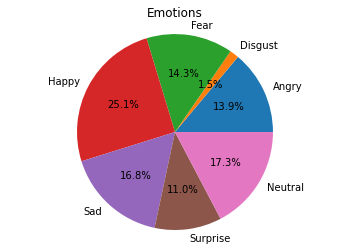

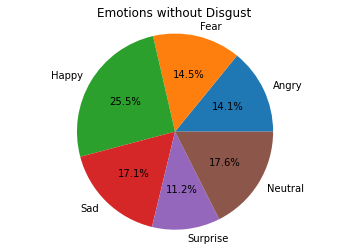

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
data_Angry = data[data['emotion'] == 0]
data_Disgust = data[data['emotion'] == 1]
data_Fear = data[data['emotion'] == 2]
data_Happy = data[data['emotion'] == 3]
data_Sad = data[data['emotion'] == 4]
data_Surprise = data[data['emotion'] == 5]
data_Neutral = data[data['emotion'] == 6]

sizes = [data_Angry.shape[0], data_Disgust.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=CLASS_NAMES, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions')


plt.show()

sizes = [data_Angry.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]
labels = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral' ]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions without Disgust')


plt.show()

In [13]:
data_exclude_disgust = data[data['emotion'] != 1] # Drops the emotion Disgust
data_exclude_disgust = data_exclude_disgust.replace({
    2 : 1,
    3 : 2,
    4 : 3,
    5 : 4,
    6 : 5
})
data_exclude_disgust.shape, data_exclude_disgust.emotion.unique()

((28261, 2), array([0, 1, 3, 5, 2, 4], dtype=int64))

In [14]:
def data_X_y(data):
    # Split data into X & y
    X = data.drop('emotion', axis='columns')
    y = data['emotion']

    # Reshapes X into 3D array
    X = [pixels.split(" ") for pixels in data["pixels"]]
    X = np.array(X)
    X = X.astype("int32")
    X = np.array([image.reshape(48, 48) for image in X])
    X = X/255.0
    X = X.reshape(len(X), 48, 48, 1)
    
    return X,y

In [15]:
X,y = data_X_y(data_exclude_disgust)

print(X.max())
print(X.shape)
print(X.min(), X.max())
print(y.shape)
print(y.unique())

1.0
(28261, 48, 48, 1)
0.0 1.0
(28261,)
[0 1 3 5 2 4]


In [16]:
from skimage.io import imread
from skimage.transform import resize

def show_samples(X, data):
    # Array with all the unique emotions
    labels = np.unique(data_exclude_disgust['emotion'])

    fig, axes = plt.subplots(6, len(labels))
    fig.set_size_inches(15,10)
    fig.tight_layout()

    for ax, label in zip(axes, labels):
        i = 0 # starting point
        for a in ax:
            # A list with a the index for the corresponding emotion
            data_label_index_list = data_exclude_disgust.index[data_exclude_disgust['emotion'] == label].tolist()

            a.imshow(X[data_label_index_list[i]])
            a.axis('off')
            a.set_title(CLASS_NAMES_WITHOUT_DISGUST[label])
            i=i+1



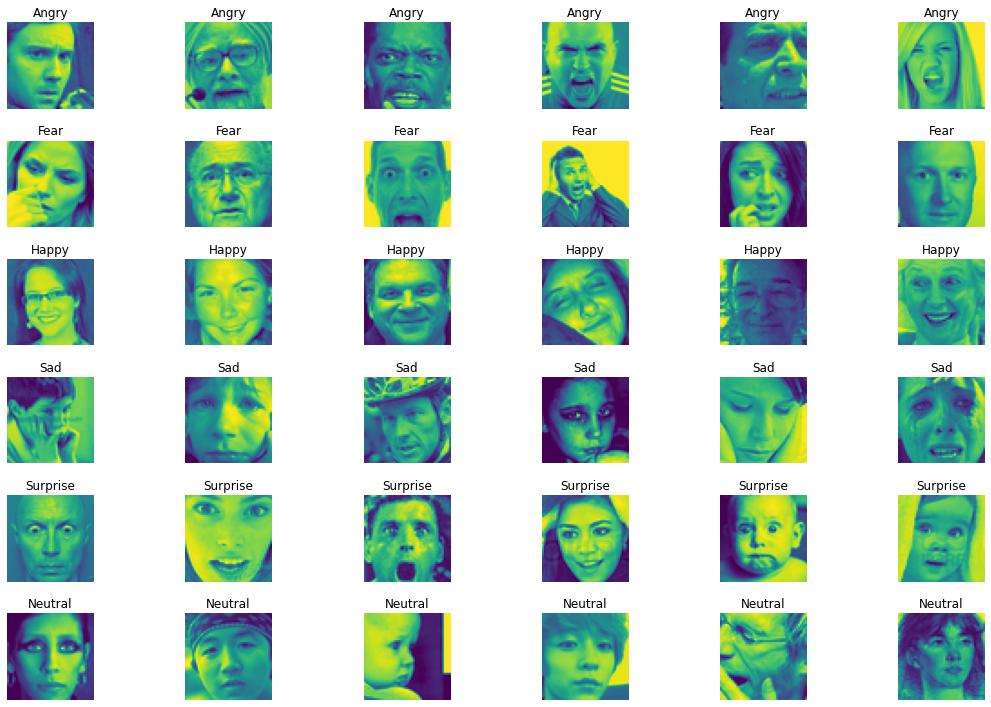

In [17]:
show_samples(X, data_exclude_disgust)

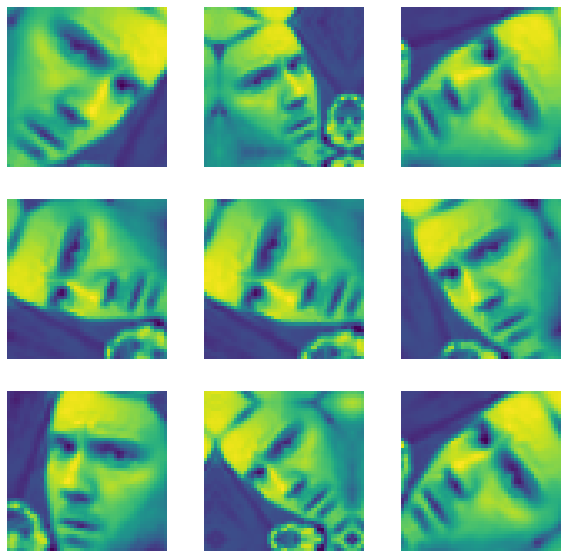

In [18]:
import tensorflow as tf
from tensorflow.keras import layers

# For more you can visit:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.25),
    layers.experimental.preprocessing.RandomZoom(0.25),
])

image = tf.expand_dims(X[0], 0) # X[0] can be changed to view different images

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [19]:
def join_list(list_pixels):
    # Creates a string from the list of pixels
    final_str = ' '.join(str(int(v)) for v in list_pixels)
    return final_str

def create_csv_data_augmentation(X, y, copies):
    # Creates new dataframe
    column_names = ["emotion", "pixels", "Original"]
    data_augmentated = pd.DataFrame(columns = column_names)
    
    for image,emotion in zip(X,y):
        # Adds the original image to the dataframe converted to a string
        image_array = list((np.array(image)).flat)
        image_string = join_list(image_array)
        new_row = {'emotion':emotion, 'pixels':image_string, 'Original':True}
        data_augmentated = data_augmentated.append(new_row,ignore_index=True)
        image_expand = tf.expand_dims(image, 0)

        for i in range(copies):
            # Adds the augmented image to the dataframe converted to a string
            augmented_image = data_augmentation(image_expand)
            augmented_image = list((np.array(augmented_image[0])).flat)
            augmented_image_string = join_list(augmented_image)
            new_row = {'emotion':emotion, 'pixels':augmented_image_string, 'Original':False}
            data_augmentated = data_augmentated.append(new_row, ignore_index=True)
    
    # Saves the dataframe to a csv file and in the title the amount of corresponding data augmentations
    save_data_augmentated_filepath = ('data/face_augmentated_{}'.format(copies))
    data_augmentated.to_csv(save_data_augmentated_filepath + '.csv', index = False)
    
    return data_augmentated

In [16]:
# # You can adjust the last value to choose how many unique copies you want to make
# # The higher the copies the longer the run time
# data_aug = create_csv_data_augmentation((X*255.0), y, 1) 

In [17]:
# # For when the file is created
FILE_NAME_AUG = "face_augmentated_1.csv" # Update name
file_path_aug = os.sep.join(data_path + [FILE_NAME_AUG])
data_aug = pd.read_csv(file_path_aug)

In [18]:
data_aug.shape

(56522, 3)

In [19]:
data_aug.head()

,emotion,pixels,Original
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,True
1,0,174 172 175 177 178 182 185 184 186 186 186 18...,False
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,True
3,0,153 146 145 153 151 145 144 155 171 175 174 16...,False
4,1,231 212 156 164 174 138 161 173 182 200 106 38...,True


In [20]:
data_aug.drop('Original', axis=1, inplace=True)
%time X_aug, y_aug = data_X_y(data_aug)
y_aug = y_aug.astype('int32')

print(X_aug.shape)
print(y_aug.shape)

Wall time: 1min 37s
(56522, 48, 48, 1)
(56522,)


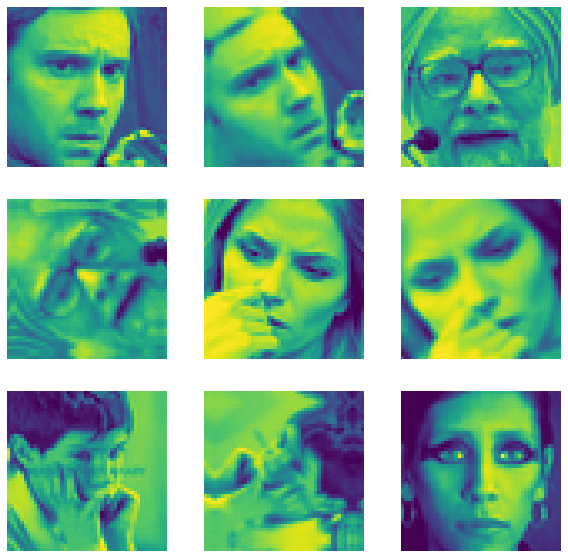

In [21]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_aug[i])
    plt.axis("off")

In [20]:
from scipy import ndimage

# Sigma can be changed for more or less blur
def blur_X(X, sigma = 0.8):
    for i in range(0, X.shape[0]):
        X[i] = ndimage.gaussian_filter(X[i], sigma=sigma)
    return X

In [21]:
X_blur = blur_X(X)

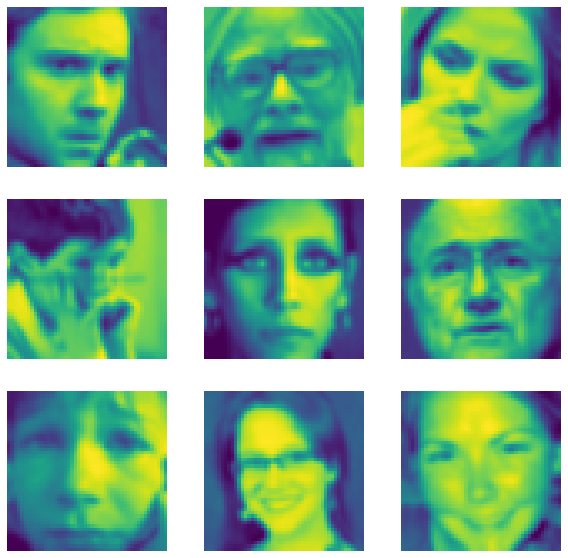

In [22]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_blur[i])
    plt.axis("off")

In [23]:
from builtins import range
from builtins import object

def reshape_X(X):
    num_training = X.shape[0]
    mask = list(range(num_training))
    X_reshape = X[mask]

    # Reshape the image data into rows
    X_reshape = np.reshape(X, (X.shape[0], -1))
    
    return X_reshape

In [24]:
print(X.shape)
X = reshape_X(X)
print(X.shape)

(28261, 48, 48, 1)
(28261, 2304)


In [25]:
X_blur = reshape_X(X_blur)

In [28]:
print(X_aug.shape)
X_aug = reshape_X(X_aug)
print(X_aug.shape)

(56522, 48, 48, 1)
(56522, 2304)


In [26]:
# pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE()

In [27]:
X_rus, y_rus = rus.fit_resample(X,y) # This data is undersampled
X_ros, y_ros = ros.fit_resample(X,y) # This data is oversampled
X_smote, y_smote = smote.fit_resample(X,y) # This data is oversampled with smote

print(y_rus.value_counts())
print(y_ros.value_counts())
print(y_smote.value_counts())

0    3170
1    3170
2    3170
3    3170
4    3170
5    3170
Name: emotion, dtype: int64
0    7214
1    7214
2    7214
3    7214
4    7214
5    7214
Name: emotion, dtype: int64
0    7214
1    7214
2    7214
3    7214
4    7214
5    7214
Name: emotion, dtype: int64


In [28]:
print("SMOTE has of the {}, {} unique samples".format(len(X_smote),len(np.unique(X_smote, axis=0))))
print("ROS has of the {}, {} unique samples".format(len(X_ros),len(np.unique(X_ros, axis=0))))
print("RUS has of the {}, {} unique samples".format(len(X_rus),len(np.unique(X_rus, axis=0))))

SMOTE has of the 43284, 41656 unique samples
ROS has of the 43284, 27092 unique samples
RUS has of the 19020, 18207 unique samples


In [29]:
X_blur_rus, y_blur_rus = rus.fit_resample(X_blur,y) # This data is undersampled
X_blur_ros, y_blur_ros = ros.fit_resample(X_blur,y) # This data is oversampled
X_blur_smote, y_blur_smote = smote.fit_resample(X_blur,y) # This data is oversampled with smote

In [33]:
X_aug_smote, y_aug_smote = smote.fit_resample(X_aug,y_aug) # This data is oversampled with smote
X_aug_ros, y_aug_ros = ros.fit_resample(X_aug,y_aug) # This data is oversampled
X_aug_rus, y_aug_rus = rus.fit_resample(X_aug,y_aug) # This data is undersampled

In [30]:
def plot_train_test_distribution(y,loc='left', relative=True):
    width = 0.35
    CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)

    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, CLASS_NAMES_WITHOUT_DISGUST, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
    plt.suptitle('relative amount of images per type')
    

In [31]:
from sklearn.model_selection import train_test_split

In [36]:
# # These are the X & y that can be used for fitting a ML model
# X, y
# X_rus, y_rus
# X_ros, y_ros
# X_smote, y_smote

In [37]:
# # This is the augmented dataset
# # Has to be train & test split before use
# X_aug_smote, y_aug_smote
# X_aug_ros, y_aug_ros
# X_aug_rus, y_aug_rus

In [38]:
# # This is the blurred dataset
# X_blur_rus, y_blur_rus
# X_blur_ros, y_blur_ros
# X_blur_smote, y_blur_smote

In [32]:
from resizeimage import resizeimage
from PIL import Image, ImageOps

def import_test_sample(test_path):
    with open(test_path, 'r+b') as f:
        with Image.open(f) as image:
            test_image = resizeimage.resize_cover(image, [48,48])

    test_image = ImageOps.grayscale(test_image)

    test_image = np.array(test_image)
    test_image = test_image.astype("int32")
    test_image = test_image/255.0
    test_image = test_image.reshape(48, 48, 1)
    plt.imshow(test_image)
    print(test_image.shape)
    
    return test_image


In [33]:
file_path = os.sep.join(data_path + ['icml_face_data.csv'])
data_test = pd.read_csv(file_path)
test = ["PrivateTest", "PublicTest"]
data_test = data_test.rename(columns= { " pixels":"pixels"})
data_test = data_test[data_test[' Usage'].isin(test) ]

# If icml_face_data.csv is used
data_test.drop(' Usage', axis=1, inplace=True)

data_test.head()

,emotion,pixels
28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28710,1,156 184 198 202 204 207 210 212 213 214 215 21...
28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...
28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [34]:
data_test.shape

(7178, 2)

In [35]:
data_test.columns

Index(['emotion', 'pixels'], dtype='object')

In [36]:
data_test = data_test[data_test['emotion'] != 1] # Drops the emotion Disgust
data_test = data_test.replace({
    2 : 1,
    3 : 2,
    4 : 3,
    5 : 4,
    6 : 5
})
data_test.shape, data_test.emotion.unique()

((7067, 2), array([0, 3, 5, 2, 1, 4], dtype=int64))

In [37]:
X_test, y_test = data_X_y(data_test)

In [38]:
print(X_test.shape)
X_test = reshape_X(X_test)
print(X_test.shape)

(7067, 48, 48, 1)
(7067, 2304)


In [39]:
# # For Testing 
# X_test, y_test

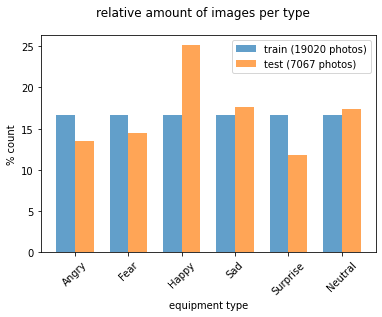

In [47]:
plot_train_test_distribution(y_rus, loc='left')
plot_train_test_distribution(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_rus)), 
    'test ({0} photos)'.format(len(y_test))
]);

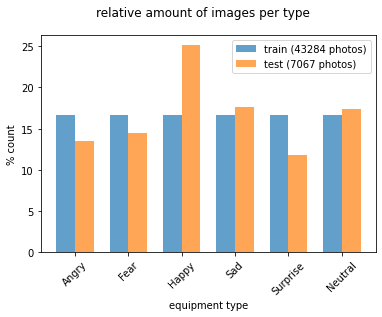

In [48]:
plot_train_test_distribution(y_ros, loc='left')
plot_train_test_distribution(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_ros)), 
    'test ({0} photos)'.format(len(y_test))
]);

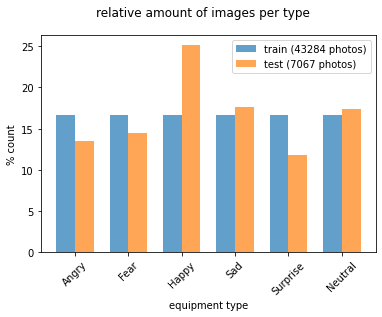

In [49]:
plot_train_test_distribution(y_smote, loc='left')
plot_train_test_distribution(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_smote)), 
    'test ({0} photos)'.format(len(y_test))
]);

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [73]:
%time logReg_imb = LogisticRegression(max_iter=50000).fit(X, y)

Wall time: 17min 10s


In [88]:
y_pred_imb = logReg_imb.predict(X_test)
metrics.accuracy_score(y_test, y_pred_imb)

0.3594170086316683

In [78]:
%time logReg_rus = LogisticRegression(max_iter=50000).fit(X_rus, y_rus)

Wall time: 11min 52s


In [89]:
y_pred_rus = logReg_rus.predict(X_test)
metrics.accuracy_score(y_test, y_pred_rus)

0.32489033536153955

In [80]:
%time logReg_ros = LogisticRegression(max_iter=50000).fit(X_ros, y_ros)

Wall time: 14min 11s


In [90]:
y_pred_ros = logReg_ros.predict(X_test)
metrics.accuracy_score(y_test, y_pred_ros)

0.33380500919767936

In [81]:
%time logReg_smote = LogisticRegression(max_iter=50000).fit(X_smote, y_smote)

Wall time: 1h 37min 58s


In [91]:
y_pred_smote = logReg_smote.predict(X_test)
metrics.accuracy_score(y_test, y_pred_smote)

0.2612140936748267

In [55]:
%time logReg_aug_smote = LogisticRegression(max_iter=20000).fit(X_train_aug_smote, y_train_aug_smote)
y_pred_aug_smote = logReg_aug_smote.predict(X_test_aug_smote)
metrics.accuracy_score(y_test_aug_smote, y_pred_aug_smote)

Wall time: 23min 9s


0.3271341111239459

In [41]:
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [67]:
pipe_std_scal = make_pipeline(StandardScaler(), LogisticRegression(max_iter=50000))
pipe_min_max_scal = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=50000))

In [92]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000))
%time pipe.fit(X, y)
pipe.score(X_test, y_test)

c:\Miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 4min 23s


0.34724777133154094

In [93]:
pipe = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=2000))
%time pipe.fit(X, y)
pipe.score(X_test, y_test)

c:\Miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 4min 25s


0.35573793688976935

In [94]:
pipe = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=20000))
%time pipe.fit(X, y)
pipe.score(X_test, y_test)

Wall time: 8min 7s


0.3594170086316683

In [ ]:
# from sklearn.linear_model import LogisticRegressionCV

# %time logRegCV_L1_smote = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train_smote, y_train_smote)

# logRegCV_L1.get_params()
# y_pred_smote = logRegCV_L1.predict(X_test_smote)
# metrics.accuracy_score(y_test_smote, y_pred_smote)

In [95]:
%time logReg_smote_2 = LogisticRegression(max_iter=50000).fit(X_smote, y_smote)
y_pred_smote_2 = logReg_smote_2.predict(X_test)
metrics.accuracy_score(y_test, y_pred_smote_2)

Wall time: 1h 14min 19s


0.2612140936748267

In [51]:
%time logReg_smote_3 = LogisticRegression(max_iter=500000).fit(X_smote, y_smote)
y_pred_smote_3 = logReg_smote_3.predict(X_test)
metrics.accuracy_score(y_test, y_pred_smote_3)

Wall time: 28min 18s


0.3326729871232489

In [53]:
# # For when the file is created
FILE_NAME_AUG = "face_augmentated_9.csv" # Update name
file_path_aug = os.sep.join(data_path + [FILE_NAME_AUG])
data_aug_9 = pd.read_csv(file_path_aug)

In [54]:
data_aug_9.head()

,emotion,pixels,Original
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,True
1,0,45 43 46 47 51 55 59 66 80 91 76 98 146 183 19...,False
2,0,121 163 191 198 198 195 173 131 112 109 95 90 ...,False
3,0,77 102 95 64 58 60 60 60 60 61 61 60 59 58 57 ...,False
4,0,88 68 59 73 92 111 127 135 139 142 145 146 147...,False


In [55]:
data_aug_9.shape

(282610, 3)

In [56]:
data_aug_9.drop('Original', axis=1, inplace=True)
%time X_aug_9, y_aug_9 = data_X_y(data_aug_9)
y_aug_9 = y_aug_9.astype('int32')

print(X_aug_9.shape)
print(y_aug_9.shape)

Wall time: 11min 49s
(282610, 48, 48, 1)
(282610,)


In [57]:
print(X_aug_9.shape)
X_aug_9 = reshape_X(X_aug_9)
print(X_aug_9.shape)

(282610, 48, 48, 1)
(282610, 2304)


In [58]:
X_aug_9_smote, y_aug_9_smote = smote.fit_resample(X_aug_9,y_aug_9) # This data is oversampled with smote
X_aug_9_ros, y_aug_9_ros = ros.fit_resample(X_aug_9,y_aug_9) # This data is oversampled
X_aug_9_rus, y_aug_9_rus = rus.fit_resample(X_aug_9,y_aug_9) # This data is undersampled

print(y_aug_9_rus.value_counts())
print(y_aug_9_ros.value_counts())
print(y_aug_9_smote.value_counts())

0    31700
1    31700
2    31700
3    31700
4    31700
5    31700
Name: emotion, dtype: int64
0    72140
1    72140
2    72140
3    72140
4    72140
5    72140
Name: emotion, dtype: int64
0    72140
1    72140
2    72140
3    72140
4    72140
5    72140
Name: emotion, dtype: int64


In [59]:
%time logReg_ros_aug_9 = LogisticRegression(max_iter=50000).fit(X_aug_9_ros, y_aug_9_ros)

Wall time: 3h 39min 53s


In [62]:
y_pred_ros_9 = logReg_ros_aug_9.predict(X_test)
metrics.accuracy_score(y_test, y_pred_ros_9)

0.26291212678647236

In [61]:
%time logReg_rus_aug_9 = LogisticRegression(max_iter=50000).fit(X_aug_9_rus, y_aug_9_rus)

Wall time: 1h 26min 52s


In [63]:
y_pred_rus_9 = logReg_ros_aug_9.predict(X_test)
metrics.accuracy_score(y_test, y_pred_rus_9)

0.26291212678647236

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
log_reg_GCV = LogisticRegression(max_iter = 50000)

In [44]:
param_grid = [
    {'penalty': ['l1', 'l2', 'elasticnet'],
     'C' : [0.001,0.01,0.1],
     'solver' : ['newton-cg', 'liblinear', 'lbfgs'],
    }
]

In [56]:
clf = GridSearchCV(log_reg_GCV, param_grid = param_grid, cv = 2, scoring='accuracy', verbose = 3, n_jobs=-1)

In [57]:
%time best_clf = clf.fit(X_rus,y_rus)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


c:\Miniconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.16666667        nan 0.32597266 0.31225026 0.32592008
        nan        nan        nan        nan 0.2617245         nan
 0.34290221 0.33743428 0.3426919         nan        nan        nan
        nan 0.33853838        nan 0.34074658 0.34074658 0.34095689
        nan        nan        nan]
  warnings.warn(


Wall time: 4min 55s


In [58]:
best_clf.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [59]:
y_pred = best_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.3601245224281874

In [60]:
%time logReg_test_clf_ros = LogisticRegression(max_iter=50000, C=0.01, penalty='l2', solver='newton-cg', n_jobs=-1).fit(X_ros, y_ros)

Wall time: 5min 12s


In [61]:
y_pred_test_clf = logReg_test_clf_ros.predict(X_test)
metrics.accuracy_score(y_test, y_pred_test_clf)

0.36210556105844066

In [62]:
%time logReg_test_clf_smote = LogisticRegression(max_iter=50000, C=0.01, penalty='l2', solver='newton-cg', n_jobs=-1).fit(X_smote, y_smote)

Wall time: 4min 45s


In [63]:
y_pred_test_clf_smote = logReg_test_clf_smote.predict(X_test)
metrics.accuracy_score(y_test, y_pred_test_clf_smote)

0.36281307485495967

In [72]:
clf_cv_3 = GridSearchCV(log_reg_GCV, param_grid = param_grid, cv = 3, scoring='accuracy', verbose = 3, n_jobs=-1)

In [73]:
%time best_clf_cv_3 = clf_cv_3.fit(X_ros,y_ros)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


c:\Miniconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.17043249        nan 0.35239349 0.34296738 0.3524397
        nan        nan        nan        nan 0.3151742         nan
 0.37124573 0.36918954 0.37122262        nan        nan        nan
        nan 0.36436096        nan 0.3825432  0.3803946  0.38245079
        nan        nan        nan]
  warnings.warn(


Wall time: 28min 54s


In [74]:
best_clf_cv_3.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [75]:
y_pred_test_clf_cv_3 = best_clf_cv_3.predict(X_test)
metrics.accuracy_score(y_test, y_pred_test_clf_cv_3)

0.3400311306070468

In [57]:
param_grid_2 = [
    {'penalty': ['l1', 'l2', 'elasticnet'],
     'C' : [0.009, 0.011, 0.012, 0.013, 0.014],
     'solver' : ['newton-cg', 'liblinear', 'lbfgs'],
    }
]

In [63]:
clf_2 = GridSearchCV(log_reg_GCV, param_grid = param_grid_2, cv = 3, scoring='accuracy', verbose = 3, n_jobs=-1)

In [66]:
%time best_clf_2 = clf_2.fit(X_rus,y_rus)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


c:\Miniconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.26834911        nan 0.34863302 0.34363828 0.34879075
        nan        nan        nan        nan 0.28091483        nan
 0.34773922 0.34505783 0.34789695        nan        nan        nan
        nan 0.28864353        nan 0.34700315 0.34495268 0.34716088
        nan        nan        nan        nan 0.293796          nan
 0.34695058 0.34479495 0.34700315        nan        nan        nan
        nan 0.29731861        nan 0.34695058 0.34500526 0.34700315
        nan        nan        nan]
  warnings.warn(


Wall time: 11min 50s


In [67]:
best_clf_2.best_params_

{'C': 0.009, 'penalty': 'l2', 'solver': 'lbfgs'}

In [68]:
y_pred = best_clf_2.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.3616810527805292

In [77]:
%time logReg_test_clf_ros = LogisticRegression(max_iter=50000, C=0.009, penalty='l2', solver='newton-cg', n_jobs=-1).fit(X_ros, y_ros)
y_pred_test_clf_ros = logReg_test_clf_ros.predict(X_test)
metrics.accuracy_score(y_test, y_pred_test_clf_ros)

Wall time: 5min 2s


0.36224706381774446

In [58]:
param_grid_3 = [
    {'penalty': ['l1', 'l2', 'elasticnet'],
     'C' : [10,100],
     'solver' : ['newton-cg', 'liblinear', 'lbfgs'],
    }
]

In [70]:
clf_3 = GridSearchCV(log_reg_GCV, param_grid = param_grid_3, cv = 2, scoring='accuracy', verbose = 3, n_jobs=-1)

In [71]:
%time best_clf_3 = clf_3.fit(X_rus,y_rus)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


c:\Miniconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.31314406        nan 0.30946372 0.31309148 0.30946372
        nan        nan        nan        nan 0.3019979         nan
 0.29726604 0.30252366 0.29716088        nan        nan        nan]
  warnings.warn(


Wall time: 3h 13min 27s


In [72]:
best_clf_3.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [73]:
y_pred = best_clf_3.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.27451535304938446

In [74]:
%time best_clf_blur_rus = clf_2.fit(X_blur_rus,y_blur_rus)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


c:\Miniconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.27229232        nan 0.34994742 0.34400631 0.34994742
        nan        nan        nan        nan 0.28070452        nan
 0.3502103  0.34479495 0.35036803        nan        nan        nan
        nan 0.2862776         nan 0.35031546 0.34516299 0.35010515
        nan        nan        nan        nan 0.29053628        nan
 0.34968454 0.34637224 0.34968454        nan        nan        nan
        nan 0.29695058        nan 0.34931651 0.34710831 0.34936909
        nan        nan        nan]
  warnings.warn(


Wall time: 11min 45s


In [75]:
best_clf_blur_rus.best_params_

{'C': 0.011, 'penalty': 'l2', 'solver': 'lbfgs'}

In [76]:
y_pred = best_clf_blur_rus.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.36705815763407384

In [53]:
%time logReg_test_clf_blur_ros = LogisticRegression(max_iter=50000, C=0.011, penalty='l2', solver='lbfgs', n_jobs=-1).fit(X_blur_ros, y_blur_ros)
y_pred_test_clf_blur_ros = logReg_test_clf_blur_ros.predict(X_test)
metrics.accuracy_score(y_test, y_pred_test_clf_blur_ros)

Wall time: 6min 24s


0.3598415169095797

In [54]:
%time logReg_test_clf_blur_smote = LogisticRegression(max_iter=50000, C=0.011, penalty='l2', solver='lbfgs', n_jobs=-1).fit(X_blur_smote, y_blur_smote)
y_pred_test_clf_blur_smote = logReg_test_clf_blur_smote.predict(X_test)
metrics.accuracy_score(y_test, y_pred_test_clf_blur_smote)

Wall time: 5min 47s


0.3613980472619216

In [64]:
%time best_clf_blur_ros = clf_2.fit(X_blur_ros,y_blur_ros)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


c:\Miniconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.3130256         nan 0.36976712 0.36759542 0.36981333
        nan        nan        nan        nan 0.3151973         nan
 0.37170779 0.3696054  0.37182331        nan        nan        nan
        nan 0.31750762        nan 0.37203124 0.37050642 0.37198503
        nan        nan        nan        nan 0.32007208        nan
 0.37253951 0.37138435 0.37253951        nan        nan        nan
        nan 0.32196655        nan 0.37332502 0.37212365 0.37337122
        nan        nan        nan]
  warnings.warn(


Wall time: 31min


In [65]:
best_clf_blur_ros.best_params_

{'C': 0.014, 'penalty': 'l2', 'solver': 'lbfgs'}

In [66]:
y_pred = best_clf_blur_ros.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.3588509975944531

In [ ]:
# X_aug_smote, y_aug_smote
# X_aug_ros, y_aug_ros

In [59]:
X_blur_aug_ros = blur_X(X_aug_ros)

In [60]:
X_blur_aug_smote = blur_X(X_aug_smote)

In [76]:
param_grid = [
    {'penalty': ['l1', 'l2', 'elasticnet'],
     'C' : [0.001,0.01,0.1],
     'solver' : ['newton-cg', 'liblinear', 'lbfgs'],
    }
]

In [77]:
clf_aug_blur = GridSearchCV(log_reg_GCV, param_grid = param_grid, cv = 3, scoring='accuracy', verbose = 3, n_jobs=-1)

In [78]:
%time best_clf_aug_blur_rus = clf_aug_blur.fit(X_blur_aug_ros,y_aug_ros)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


c:\Miniconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.1998429         nan 0.28480501 0.27372701 0.28459708
        nan        nan        nan        nan 0.26435865        nan
 0.29426578 0.2918746  0.29415026        nan        nan        nan
        nan 0.28885962        nan 0.30080399 0.29990297 0.30079244
        nan        nan        nan]
  warnings.warn(


Wall time: 1h 12min 52s


In [79]:
clf_aug_blur.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [80]:
y_pred = clf_aug_blur.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.2974388000566011

In [81]:
%time best_clf_aug_blur_smote = clf_aug_blur.fit(X_blur_aug_smote,y_aug_smote)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


c:\Miniconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.18812956        nan 0.29088116 0.2811778  0.2908234
        nan        nan        nan        nan 0.26750069        nan
 0.30169347 0.29968349 0.30160105        nan        nan        nan
        nan 0.29684179        nan 0.3094908  0.30853202 0.30934063
        nan        nan        nan]
  warnings.warn(


Wall time: 1h 11min 3s


In [82]:
best_clf_aug_blur_smote.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [83]:
y_pred = best_clf_aug_blur_smote.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.31427762841375406

In [45]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

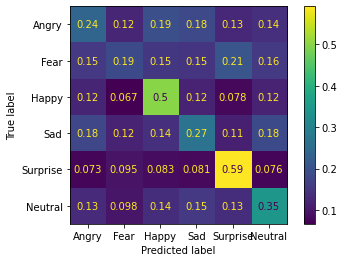

In [91]:
%time logReg_test_clf_blur_smote = LogisticRegression(max_iter=50000, C=0.011, penalty='l2', solver='lbfgs', n_jobs=-1).fit(X_blur_smote, y_blur_smote)
plot_confusion_matrix(logReg_test_clf_blur_smote, X_test, y_test, display_labels = CLASS_NAMES_WITHOUT_DISGUST, normalize="true");

In [96]:
y_pred = logReg_test_clf_blur_smote.predict(X_test)
print(classification_report(y_test, y_pred, target_names=CLASS_NAMES_WITHOUT_DISGUST))

              precision    recall  f1-score   support

       Angry       0.22      0.24      0.23       958
        Fear       0.25      0.19      0.21      1024
       Happy       0.54      0.50      0.52      1774
         Sad       0.30      0.27      0.28      1247
    Surprise       0.39      0.59      0.47       831
     Neutral       0.35      0.35      0.35      1233

    accuracy                           0.36      7067
   macro avg       0.34      0.35      0.34      7067
weighted avg       0.36      0.36      0.36      7067



Wall time: 7min 51s


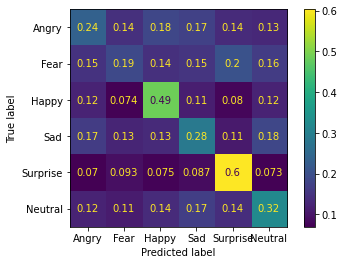

In [97]:
%time logReg_test_clf_blur_ros = LogisticRegression(max_iter=50000, C=0.014, penalty='l2', solver='lbfgs', n_jobs=-1).fit(X_blur_ros, y_blur_ros)
plot_confusion_matrix(logReg_test_clf_blur_ros, X_test, y_test, display_labels = CLASS_NAMES_WITHOUT_DISGUST, normalize="true");

In [98]:
y_pred = logReg_test_clf_blur_ros.predict(X_test)
print(classification_report(y_test, y_pred, target_names=CLASS_NAMES_WITHOUT_DISGUST))

              precision    recall  f1-score   support

       Angry       0.22      0.24      0.23       958
        Fear       0.23      0.19      0.21      1024
       Happy       0.55      0.49      0.51      1774
         Sad       0.31      0.28      0.30      1247
    Surprise       0.39      0.60      0.47       831
     Neutral       0.33      0.32      0.33      1233

    accuracy                           0.36      7067
   macro avg       0.34      0.35      0.34      7067
weighted avg       0.36      0.36      0.35      7067



In [99]:
# To make the testing more balanced
X_test_rus, y_test_rus = rus.fit_resample(X_test, y_test)

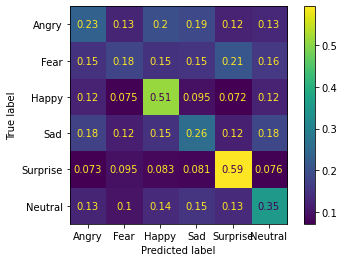

In [100]:
plot_confusion_matrix(logReg_test_clf_blur_smote, X_test_rus, y_test_rus, display_labels = CLASS_NAMES_WITHOUT_DISGUST, normalize="true");

In [101]:
y_pred = logReg_test_clf_blur_smote.predict(X_test_rus)
print(classification_report(y_test_rus, y_pred, target_names=CLASS_NAMES_WITHOUT_DISGUST))

              precision    recall  f1-score   support

       Angry       0.27      0.23      0.25       831
        Fear       0.26      0.18      0.21       831
       Happy       0.42      0.51      0.46       831
         Sad       0.28      0.26      0.27       831
    Surprise       0.47      0.59      0.53       831
     Neutral       0.34      0.35      0.35       831

    accuracy                           0.35      4986
   macro avg       0.34      0.35      0.34      4986
weighted avg       0.34      0.35      0.34      4986



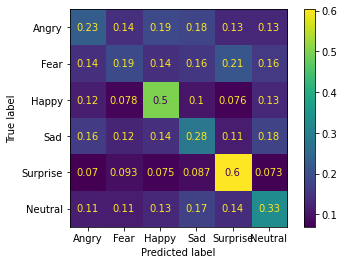

In [102]:
plot_confusion_matrix(logReg_test_clf_blur_ros, X_test_rus, y_test_rus, display_labels = CLASS_NAMES_WITHOUT_DISGUST, normalize="true");

In [103]:
y_pred = logReg_test_clf_blur_ros.predict(X_test_rus)
print(classification_report(y_test_rus, y_pred, target_names=CLASS_NAMES_WITHOUT_DISGUST))

              precision    recall  f1-score   support

       Angry       0.27      0.23      0.25       831
        Fear       0.26      0.19      0.22       831
       Happy       0.42      0.50      0.46       831
         Sad       0.29      0.28      0.28       831
    Surprise       0.47      0.60      0.53       831
     Neutral       0.33      0.33      0.33       831

    accuracy                           0.35      4986
   macro avg       0.34      0.35      0.34      4986
weighted avg       0.34      0.35      0.34      4986



In [113]:
%time logReg_test_clf_blur_smote = LogisticRegression(max_iter=50000, C=0.011, penalty='l2', solver='lbfgs', n_jobs=-1).fit(X_blur_smote, y_blur_smote)
y_pred = logReg_test_clf_blur_smote.predict(X_test_rus)
metrics.accuracy_score(y_test_rus, y_pred)

Wall time: 5min 56s


0.3545928600080225

In [114]:
%time logReg_test_clf_blur_ros = LogisticRegression(max_iter=50000, C=0.014, penalty='l2', solver='lbfgs', n_jobs=-1).fit(X_blur_ros, y_blur_ros)
y_pred = logReg_test_clf_blur_ros.predict(X_test_rus)
metrics.accuracy_score(y_test_rus, y_pred)

Wall time: 7min 39s


0.3545928600080225

In [ ]:
# Training more models with augmented data doesn't improve perfomance and is a waste of time to test at the moment. 

In [1]:
import joblib

In [115]:
joblib.dump(logReg_test_clf_blur_smote, 'logReg_test_clf_blur_smote_36%.joblib')

['logReg_test_clf_blur_smote_36%.joblib']

In [107]:
joblib.dump(logReg_test_clf_blur_ros, 'logReg_test_clf_blur_ros_36%.joblib')

['logReg_test_clf_blur_ros_36%.joblib']

In [46]:
X_test_rus, y_test_rus = rus.fit_resample(X_test,y_test) # This data is undersampled

In [2]:
logReg_blur_ros = joblib.load("E:/Anaconda/TrainedModels/LR/logReg_test_clf_blur_ros_36%.joblib")

C:\anaconda\envs\mai\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:
logReg_blur_smote = joblib.load("E:/Anaconda/TrainedModels/LR/logReg_test_clf_blur_smote_36%.joblib")

In [51]:
y_pred = logReg_blur_ros.predict(X_test_rus)
metrics.accuracy_score(y_test_rus, y_pred)

0.3489771359807461

In [52]:
y_pred = logReg_blur_smote.predict(X_test_rus)
metrics.accuracy_score(y_test_rus, y_pred)

0.3527878058563979